In [172]:
# Extracting files from zip into the JupyterNotebook

from zipfile import ZipFile

file_name = r"C:\Users\Lucky Abolorunke\Downloads\hackathon.zip"
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print("extracting...")
    zip.extractall()
    print('Done!')
    

File Name                                             Modified             Size
data.csv                                       2021-01-21 16:54:50         6514
images/                                        2021-01-21 16:13:12            0
images/10-05.jpg                               2021-01-21 16:11:30      1048191
images/42001.jpg                               2021-01-21 16:11:26      1100237
images/7mill.jpg                               2021-01-21 16:11:30      2974652
images/blankcheck.jpg                          2021-01-21 16:11:26      1095513
images/blankcheck2.jpg                         2021-01-21 16:11:26      1078640
images/check_1.png                             2021-01-21 16:09:02       440381
images/check_10.png                            2021-01-21 16:09:02       430428
images/check_11.png                            2021-01-21 16:09:02       443421
images/check_12.png                            2021-01-21 16:09:02       443808
images/check_13.png                     

In [173]:
  
# importation of models

import cv2
import os, io
from google.cloud import vision
from google import type
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"C:\Users\Lucky Abolorunke\Downloads\ServiceAccountToken.json"

In [408]:
# extract the names of the files
image_names = []
invalid_image = [ '7mill.jpg', '10-05.jpg', '42001.jpg', 'blankcheck.jpg', 'blankcheck2.jpg', 'five.jpg', 'onemillthree.jpg']

for num in range(1, 71):
    name = "check_{}.png".format(num)
    image_names.append(name)
image_names.extend(invalid_image)  
for num in range(11, 38):
    name = "image_{}.jpg".format(num)
    image_names.append(name)
len(image_names)    


104

In [350]:
# these lines of code is use to crop three areas of interest that are in the cheque, this includes Date, amount in words, and amount in figues; 
# the crop images are save to a directory on my PC; reasons for cropping is to prevent noise.
def CropSaveImage(file_name, left, height, right, bottom):
    
    originalImage = cv2.imread(file_name)
    img = Image.fromarray(originalImage)
    #the cropped image
    xxd = img.crop((left, height, right, bottom))
    return xxd 



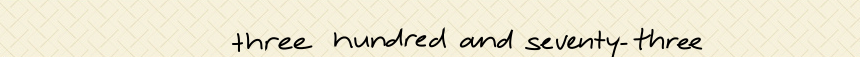

In [426]:
# # name = 'check_12.jpg'
# name =  r"images/10-05.jpg"
# originalImage = cv2.imread(name)
# img = Image.fromarray(originalImage)
# # jpg text
# # xxd = img.crop((50, 365, 1450, 500))
# # # # jpg date
# # xxd = img.crop((1230, 120, 1700, 225))
# # figure in amount
# xxd = img.crop((0, 400, 1850, 400))
# img
# xxd
# name = image_names[7]
# file_name = r"images/{}".format(name)
# #save the cropped of the amount in words
figure_crop = CropSaveImage(file_name, 50, 245, 910, 302)
figure_crop

In [435]:
def SaveCrop(list_names, f):
    for name in list_names:
        
        try:
            file_name = f.format(name)

            if name[-3:] == 'jpg':
                date_crop = CropSaveImage(file_name, 1230, 120, 1700, 225)
                date_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\date_{}".format(name))

                #save the crop amount in figures
                figure_crop = CropSaveImage(file_name, 1490, 280, 1850, 400)
                figure_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\figure_{}".format(name))

                #save the cropped of the amount in words
                text_crop = CropSaveImage(file_name, 50, 365, 1450, 500)
                text_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\text_{}".format(name))
            else:
                date_crop = CropSaveImage(file_name, 700, 100, 1124, 160)
                date_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\date_{}".format(name))

                #save the crop amount in figures
                figure_crop = CropSaveImage(file_name, 910, 200, 1124, 268)
                figure_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\figure_{}".format(name))

                #save the cropped of the amount in words
                text_crop = CropSaveImage(file_name, 50, 245, 910, 302)
                text_crop.save(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\text_{}".format(name))
        except:
            pass
    return True
    

In [437]:
SaveCrop(image_names, r"images/{}")


True

In [401]:
def figure(string):
    result = ''
    for i in string:
        if i in {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.'}:
            result += i
    try:
        return '{0:.2f}'.format(float(result))
    except:
        return '-'

In [402]:
# file_name should be open with r"" to avoid error code.
def ReadImages(file_name):
    

    file_name = file_name.format(name)
    with io.open(file_name, 'rb') as imgx:
        content = imgx.read()
    image = vision.Image(content=content)

    return image 



def ImageText(file_name, list_names):
    result = []
    client = vision.ImageAnnotatorClient()

    for name in list_names:
        x_file = file_name.format(name)
        img = ReadImages(x_file)
        response = client.document_text_detection(image=img)
        doc = response.full_text_annotation.text
        result.append(doc.replace('\n', ' '))
    return result     
        
def ImageFigure(file_name, list_names):
    result = []
    client = vision.ImageAnnotatorClient()

    for name in list_names:
        x_file = file_name.format(name)
        img = ReadImages(x_file)
        response = client.document_text_detection(image=img)
        doc = response.full_text_annotation.text
        result.append(figure(doc))
        
    return result     

In [403]:
file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\figure_{}"
fig_amount = ImageFigure(file_name, image_names)
file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\text_{}"
text_amount = ImageText(file_name, image_names)
file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\date_{}"
date =  ImageText(file_name, image_names)

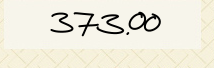

In [424]:
# # name = 'check_12.jpg'
# name =  r"images/10-05.jpg"
# originalImage = cv2.imread(name)
# img = Image.fromarray(originalImage)
# # jpg text
# # xxd = img.crop((50, 365, 1450, 500))
# # # # jpg date
# # xxd = img.crop((1230, 120, 1700, 225))
# # figure in amount
# xxd = img.crop((0, 400, 1850, 400))
# img
# xxd
name = validation_names[7]
file_name = r"validation/{}".format(name)
#save the cropped of the amount in words
figure_crop = CropSaveImage(file_name, 910, 200, 1124, 268)
figure_crop
    

In [445]:
# CREATE csv FILE for the train dataset
diction =  {'Path': image_names,
           'Date': date,
           'Amount in word form': text_amount,
           'Amount in number form': fig_amount}

df = pd.DataFrame(diction)
# df.tail(50)
df.to_csv(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\finale\train_df.csv")

In [409]:
# Extract the testing files

validation_names = ['0429.jpg', '1800.jpg']


for num in range(71, 91):
    name = "check_{}.png".format(num)
    validation_names.append(name) 
for num in range(41, 45):
    name = "image_{}.jpg".format(num)
    validation_names.append(name)
len(validation_names) 

26

In [438]:
# crop files and save it to folder 
SaveCrop(validation_names, r"validation/{}")


True

In [439]:
val_file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\figure_{}"
val_fig_amount = ImageFigure(val_file_name, validation_names)
val_file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\text_{}"
val_text_amount = ImageText(val_file_name, validation_names)
val_file_name = r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\date_{}"
val_date =  ImageText(val_file_name, validation_names)

In [444]:
# CREATE csv FILE for the test dataset
diction =  {'Path': validation_names,
           'Date': val_date,
           'Amount in word form': val_text_amount,
           'Amount in number form': val_fig_amount}

test_df = pd.DataFrame(diction)
test_df.to_csv(r"C:\Users\Lucky Abolorunke\Desktop\citi_folder\finale\validation_df.csv")

In [446]:
test_df

,Path,Date,Amount in word form,Amount in number form
0,0429.jpg,,,-
1,1800.jpg,,,-
2,check_71.png,3-26-52,five hundred and ninety-two,592.00
3,check_72.png,4-3-96,seven hundred and thirty-nine,0.00
4,check_73.png,카제,two hundred and three,-
5,check_74.png,レース2_211,seven million two hundred and twenty thousand,7220000.00
6,check_75.png,भी-52-3,one million thirty thousand,1030000.00
7,check_76.png,6-27-35,three hundred and seventy-three,378.00
8,check_77.png,7-104,two hundred and twenty-four,224.00
9,check_78.png,10-20 91,four hundred and twenty-seven,427.00
